In [27]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from WindPy import w
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!
You can use w.menu to help yourself to create commands(WSD,WSS,WST,WSI,WSQ,...)!

COPYRIGHT (C) 2016 WIND HONGHUI INFORMATION & TECHKNOLEWDGE CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [10]:
codes = ['CI0050%02d.WI'%(i) for i in range(1, 30)]
INDEX_DIR = 'D:/Data/index'

In [20]:
def roll(df, w):
    """
    This fucntion comes from:
    http://stackoverflow.com/questions/37486502/why-does-pandas-rolling-use-single-dimension-ndarray/37491779#37491779
    """
    df.fillna(df.mean(), inplace=True)
    roll_array = np.dstack([df.values[i:i+w, :] for i in range(len(df.index) - w + 1)]).T
    panel = pd.Panel(roll_array,
                     items=df.index[w-1:],
                     major_axis=df.columns,
                     minor_axis=pd.Index(range(w), name='roll'))
    return panel.to_frame().unstack().T.groupby(level=0)

In [12]:
dic = {}
for code in codes:
    temp = pd.read_excel('%s/%s.xlsx'%(INDEX_DIR, code), index_col=0)
    dic[code] = temp
pnl = pd.Panel(dic)

In [17]:
pnl.ix[:, :, 'return'] = pnl.minor_xs('close').pct_change()

# 历史收益率

In [19]:
df = pnl.minor_xs('return')

# 滚动一个季度的主成分解释率

In [21]:
rolled_df = roll(df, 60)

In [23]:
def principal_ratio(df):
    pca = PCA()
    pca.fit(df)
    pricipal = pca.explained_variance_ratio_
    return pricipal[:5].sum()

In [25]:
ratio = rolled_df.apply(lambda x: principal_ratio(x))

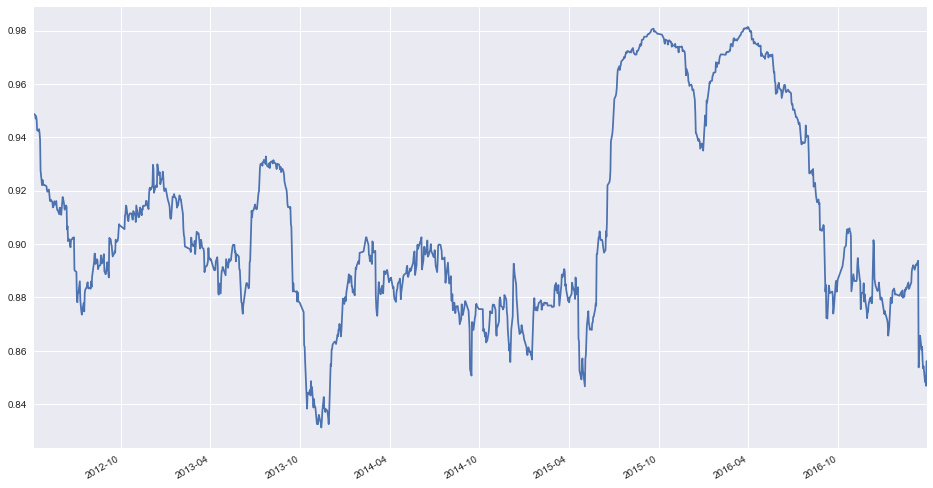

In [28]:
plt.figure(figsize=(16, 9))
ratio.plot()

In [32]:
res = pd.DataFrame({'con60': ratio})

In [33]:
res

,con60
2012-04-06 00:00:00.005,0.948795
2012-04-09 00:00:00.005,0.948408
2012-04-10 00:00:00.005,0.947005
2012-04-11 00:00:00.005,0.947885
2012-04-12 00:00:00.005,0.946549
2012-04-13 00:00:00.005,0.942609
2012-04-16 00:00:00.005,0.942301
2012-04-17 00:00:00.005,0.943059
2012-04-18 00:00:00.005,0.941449
2012-04-19 00:00:00.005,0.939034
